## Following along a youtube video for using keras to do image classification. 

In [2]:
# We will use a dataset from kaggle on images on cats and dogs to classify which is which. 
# Import packages we will need for this notebook and future ones as well. 

import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [3]:
cd

C:\Users\tradk


In [4]:
# We need to taek the downlaoded data and just organize it. Split it into train, test, validation for cats and dogs. 

os.chdir('dogs-vs-cats/train')
if os.path.isdir('train/dog') is False:
    os.makedirs('train/dog')
    os.makedirs('train/cat')
    os.makedirs('valid/dog')
    os.makedirs('valid/cat')
    os.makedirs('test/dog')
    os.makedirs('test/cat')

    for i in random.sample(glob.glob('cat*'), 500):
        shutil.move(i, 'train/cat')      
    for i in random.sample(glob.glob('dog*'), 500):
        shutil.move(i, 'train/dog')
    for i in random.sample(glob.glob('cat*'), 100):
        shutil.move(i, 'valid/cat')        
    for i in random.sample(glob.glob('dog*'), 100):
        shutil.move(i, 'valid/dog')
    for i in random.sample(glob.glob('cat*'), 50):
        shutil.move(i, 'test/cat')      
    for i in random.sample(glob.glob('dog*'), 50):
        shutil.move(i, 'test/dog')

os.chdir('../../')

In [50]:
# We need to import this package for the paths below. 

from pathlib import Path

In [51]:
# We use the handles for each of the paths. 

train_path = Path(r"C:\Users\tradk\dogs-vs-cats\train\train")
train_valid = Path(r"C:\Users\tradk\dogs-vs-cats\train\valid")
train_test = Path(r"C:\Users\tradk\dogs-vs-cats\train\test")


In [52]:
# Create batches for each section.

train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=train_path, target_size=(224,224), classes=['cat', 'dog'], batch_size=10)

valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=train_valid, target_size=(224,224), classes=['cat', 'dog'], batch_size=10)

test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=train_test, target_size=(224,224), classes=['cat', 'dog'], batch_size=10, shuffle=False)

Found 1000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [53]:
# We will look at some images from the batches. 

imgs, labels = next(train_batches)

In [54]:
# Function to help us plot the image. 

def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

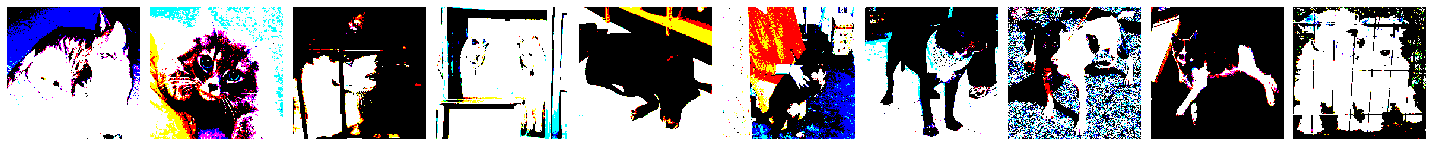

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]]


In [57]:
# Print out a batch of color data. Cats are 0's and Dogs are 1's. 

plotImages(imgs)
print(labels)

## Build the Model

In [63]:
# Here we build the CNN that we will use for the classification. 

model = Sequential([
    Conv2D(filters= 32, kernel_size= (3,3), activation = 'relu', padding = 'same', input_shape = (224,224,3)),
    MaxPool2D(pool_size= (2,2), strides = 2),
    Conv2D(filters= 64, kernel_size= (3,3), activation = 'relu', padding = 'same'),
    MaxPool2D(pool_size= (2,2), strides = 2),
    Flatten(),
    Dense(units=2, activation = 'softmax')
])

In [64]:
# Look at the summary of the built model. 

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 200704)            0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 401410    
Total params: 420,802
Trainable params: 420,802
Non-trainable params: 0
________________________________________________

In [65]:
# Compile the model.

model.compile(optimizer = Adam(learning_rate = 0.0001), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [67]:
# Fit the model to some data. 

model.fit(x = train_batches, validation_data = valid_batches, epochs = 10, verbose = 2 )

Epoch 1/10
100/100 - 64s - loss: 15.4691 - acc: 0.5620 - val_loss: 4.2473 - val_acc: 0.5700
Epoch 2/10
100/100 - 56s - loss: 2.1509 - acc: 0.7750 - val_loss: 3.6666 - val_acc: 0.5600
Epoch 3/10
100/100 - 49s - loss: 0.5640 - acc: 0.8990 - val_loss: 2.8962 - val_acc: 0.6000
Epoch 4/10
100/100 - 49s - loss: 0.1172 - acc: 0.9670 - val_loss: 3.0680 - val_acc: 0.6100
Epoch 5/10
100/100 - 49s - loss: 0.0684 - acc: 0.9750 - val_loss: 4.0988 - val_acc: 0.6250
Epoch 6/10
100/100 - 49s - loss: 0.0764 - acc: 0.9830 - val_loss: 2.8419 - val_acc: 0.6650
Epoch 7/10
100/100 - 49s - loss: 0.0209 - acc: 0.9950 - val_loss: 2.9445 - val_acc: 0.6050
Epoch 8/10
100/100 - 49s - loss: 0.0173 - acc: 0.9960 - val_loss: 3.3317 - val_acc: 0.6100
Epoch 9/10
100/100 - 50s - loss: 0.0040 - acc: 0.9980 - val_loss: 3.0023 - val_acc: 0.5950
Epoch 10/10
100/100 - 51s - loss: 6.8707e-04 - acc: 1.0000 - val_loss: 3.0360 - val_acc: 0.6050


## The best model has an accurary of about 66.5 %